In [7]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [8]:
df = pd.read_csv('data/churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
df["Churn"].value_counts(normalize=True)*100

#Observamos que 26.5% dos clientes cancelaram o serviço.

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [14]:
#separando os dados em variáveis X e y
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [15]:
#convertendo variável alvo em numérico
y = y.map({'No':0, 'Yes':1})

In [16]:
# mudando colunas categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = LR.predict(X_test)
y_proba = LR.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [20]:
#fazendo matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)


Matriz de Confusão:
 [[918 117]
 [173 201]]


In [21]:
#fazendo a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.794180269694819


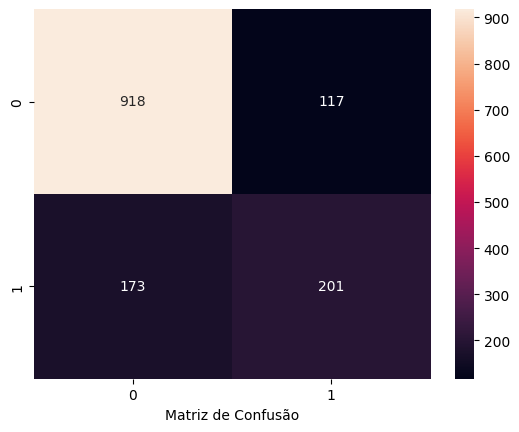

In [22]:
#mostrando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Matriz de Confusão')
plt.show()

In [23]:
#fazendo AUC-ROC
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc)

AUC-ROC: 0.8403265390477667


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [26]:
#mostrar matriz de confusão
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusão:\n", cm_rf)

Matriz de Confusão:
 [[955  80]
 [201 173]]


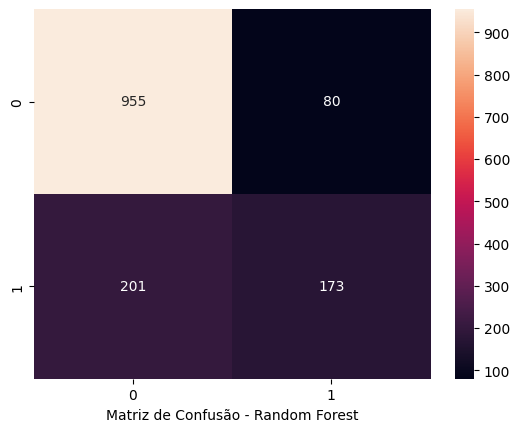

In [28]:
#mostrando a matriz de confusão
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Matriz de Confusão - Random Forest')
plt.show()

In [29]:
#executar o ROC-AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("AUC-ROC - Random Forest:", auc_rf)

AUC-ROC - Random Forest: 0.8276964013536905


In [ ]:
## Conclusão
#O Random Forest apresentou melhor desempenho na previsão de churn, especialmente
#na capacidade de discriminar clientes com maior risco de cancelamento, medida
#por ROC AUC. Os resultados indicam que o modelo pode apoiar estratégias de
#retenção, permitindo ações preventivas direcionadas aos clientes mais propensos
#ao churn.